In [1]:
import pandas as pd
import numpy as np
import krippendorff
import statistics
# import statsmodels
# from statsmodels.stats import inter_rater

In [2]:
df = pd.read_csv ("/home/marem/VscProjects/theGIRLS/IAA/all_outputs - Comparazione_modelli.csv", sep=",")
print("shape: ", df.shape)
df = df.reset_index()
df = df.rename(columns={"index":"temp_id"})
df = df.dropna()
print("shape: ", df.shape)

shape:  (101, 25)
shape:  (100, 26)


In [3]:
model_1 = df[['temp_id','model1_Pier', 'model1_Silvia', 'model1_Marem']]
model_2 = df[['temp_id','model2_Pier', 'model2_Silvia', 'model2_Marem']]
model_3 = df[['temp_id','model3_Pier', 'model3_Silvia', 'model3_Marem']]
model_4 = df[['temp_id','model4_Pier', 'model4_Silvia', 'model4_Marem']]
model_5 = df[['temp_id','model5_Pier', 'model5_Silvia', 'model5_Marem']]
model_6 = df[['temp_id','model6_Pier', 'model6_Silvia', 'model6_Marem']]
model_7 = df[['temp_id','model7_Pier', 'model7_Silvia', 'model7_Marem']]
model_8 = df[['temp_id','model8_Pier', 'model8_Silvia', 'model8_Marem']]
models = [model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_8]

In [4]:
list_tags = ["correct", "wrong", "problematic"]

agreements_k = []
dict_means = {}

for i, model in enumerate(models, 1):
    list_means = []
    model_melted = model.melt(id_vars="temp_id",var_name="annotators", value_name="label")
    label_count = model_melted[["label","annotators"]].value_counts().sort_index()
    print(label_count)
    list_labels = model_melted["label"].tolist()
    tot = len(list_labels)
    count_verde = list_labels.count("verde")
    count_rosso = list_labels.count("rosso")
    count_blu = list_labels.count("blu")

    mean_verde = np.round(count_verde / tot, 3)
    mean_rosso = np.round(count_rosso / tot, 3)
    mean_blu = np.round(count_blu / tot, 3)

    list_means.append(mean_verde)
    list_means.append(mean_rosso)
    list_means.append(mean_blu)
    
    dict_means[i] = {list_tags[j]: list_means[j] for j in range(len(list_tags))}
    # dict_means[i] = list_means

    model_melted = model_melted.replace(["verde", "rosso", "blu"], [1, 0, -1])
    df_label_matrix = model_melted.pivot_table(index='annotators', columns='temp_id', values='label')
    df_label_matrix.to_csv (f"/home/marem/VscProjects/theGIRLS/IAA/label_matrices/model_{i}.csv")
    label_matrix = df_label_matrix.to_numpy(na_value=np.nan, dtype='float')
    iaa_krip = krippendorff.alpha(reliability_data=label_matrix, level_of_measurement='nominal')

    agreements_k.append(iaa_krip)
    print (f"Krippendorff on model_{i}: {iaa_krip:.2f}")
    print("\n\n")

        # table = statsmodels.stats.inter_rater.aggregate_raters(label_matrix)
    # iaa_fleiss =  statsmodels.stats.inter_rater.fleiss_kappa(table[0], method='fleiss')
    # agreements_f.append(iaa_fleiss)
    # print (f"Fleiss on model_{i}: {iaa_fleiss:.2f}")

label  annotators   
blu    model1_Marem      5
       model1_Pier       4
       model1_Silvia     3
rosso  model1_Marem     12
       model1_Pier       8
       model1_Silvia    16
verde  model1_Marem     83
       model1_Pier      88
       model1_Silvia    81
Name: count, dtype: int64
Krippendorff on model_1: 0.39



label  annotators   
blu    model2_Marem     20
       model2_Pier      19
       model2_Silvia    16
rosso  model2_Marem      6
       model2_Pier       7
       model2_Silvia    11
verde  model2_Marem     74
       model2_Pier      74
       model2_Silvia    73
Name: count, dtype: int64
Krippendorff on model_2: 0.78



label  annotators   
blu    model3_Marem      7
       model3_Pier       7
       model3_Silvia     4
rosso  model3_Marem     10
       model3_Pier       9
       model3_Silvia    12
verde  model3_Marem     83
       model3_Pier      84
       model3_Silvia    84
Name: count, dtype: int64
Krippendorff on model_3: 0.51



label  annotators   
blu    mod

In [5]:
mean_agreement_k = statistics.mean(agreements_k)
# mean_agreement_f = statistics.mean(agreements_f)

print(f"Agreement on average (Krippendorff): {mean_agreement_k:.2f}")
# print(f"Agreement on average (Fleiss): {mean_agreement_f:.2f}")

Agreement on average (Krippendorff): 0.59


In [23]:
model_name = ["NIRO Mask-noMentions", "NIRO Mask-Mentions", "NIRO noMask_noMentions", "NIRO noMask-Mentions",
              "IRO Mask-noMentions", "IRO Mask-Mentions", "IRO noMask_noMentions", "IRO noMask-Mentions"]

dict_means = dict(zip(model_name, list(dict_means.values())))
print(dict_means)

{'NIRO Mask-noMentions': {'correct': 0.84, 'wrong': 0.12, 'problematic': 0.04}, 'NIRO Mask-Mentions': {'correct': 0.737, 'wrong': 0.08, 'problematic': 0.183}, 'NIRO noMask_noMentions': {'correct': 0.837, 'wrong': 0.103, 'problematic': 0.06}, 'NIRO noMask-Mentions': {'correct': 0.693, 'wrong': 0.033, 'problematic': 0.273}, 'IRO Mask-noMentions': {'correct': 0.583, 'wrong': 0.38, 'problematic': 0.037}, 'IRO Mask-Mentions': {'correct': 0.62, 'wrong': 0.317, 'problematic': 0.063}, 'IRO noMask_noMentions': {'correct': 0.413, 'wrong': 0.53, 'problematic': 0.057}, 'IRO noMask-Mentions': {'correct': 0.353, 'wrong': 0.46, 'problematic': 0.187}}


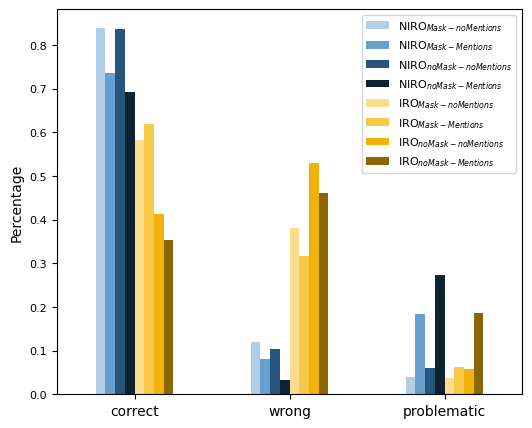

In [24]:
import matplotlib.pyplot as plt 
colors = ['#b1cee6', '#679fce', '#27557b', '#0f2231', '#fbdd8d', '#f8c948', '#f1b308', '#8a6604']
ax= pd.DataFrame(dict_means).plot(kind='bar', color=colors, figsize=(6,5), fontsize=8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=10)
# plt.legend(fontsize=8)
ax.set_ylabel('Percentage', fontsize=10)
handles, labels = ax.get_legend_handles_labels()
new_labels = [
    r'NIRO$_{Mask-noMentions}$',
    r'NIRO$_{Mask-Mentions}$',
    r'NIRO$_{noMask-noMentions}$',
    r'NIRO$_{noMask-Mentions}$',
    r'IRO$_{Mask-noMentions}$',
    r'IRO$_{Mask-Mentions}$',
    r'IRO$_{noMask-noMentions}$',
    r'IRO$_{noMask-Mentions}$'
]
ax.legend(handles, new_labels, fontsize=8)
plt.savefig("plot_model_choice.png")
plt.show()
